In [1]:
from google.colab import drive
drive.mount('/content/grive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/grive


In [2]:
# just to use 50% of My GPU memoary
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# importing all necessary library
from tensorflow.keras.layers import Dense,Flatten,Lambda,Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# fix the image size and load dataset
IMAGE_SIZE=[224,224]

train_path='/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train'
test_path='/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/test'

In [5]:
# import the resnet as below shown and preprocess frontend for resnet

resnet=ResNet50(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
# Just to train last layer
for layer in resnet.layers:
  layer.trainable=False

In [21]:
# Checking the output class
from glob import glob
Folder=glob('/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/*')
Folder

['/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/diseased cotton leaf',
 '/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/fresh cotton leaf',
 '/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/diseased cotton plant',
 '/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/fresh cotton plant']

In [22]:
# Our layer
x=Flatten()(resnet.output)

In [23]:
prediction = Dense(len(Folder),activation='softmax')(x)

In [24]:
# Creating the model
model=Model(inputs=resnet.input,outputs=prediction)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [25]:
# Compile the mmodel
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
# loading The datset through Imagedatagenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
training_set=train_datagen.flow_from_directory('/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [28]:
test_set=test_datagen.flow_from_directory('/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/test',
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 18 images belonging to 4 classes.


In [29]:
# fit the model
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      validation_steps=len(test_set),
                      steps_per_epoch=len(training_set),
                      epochs=20)

Epoch 1/20
61/61 [==============================] - 563s 9s/step - loss: 2.4391 - accuracy: 0.4029 - val_loss: 1.1760 - val_accuracy: 0.6111
Epoch 2/20
61/61 [==============================] - 37s 600ms/step - loss: 0.9880 - accuracy: 0.5910 - val_loss: 1.4045 - val_accuracy: 0.5556
Epoch 3/20
61/61 [==============================] - 37s 599ms/step - loss: 0.9519 - accuracy: 0.6166 - val_loss: 0.8055 - val_accuracy: 0.6667
Epoch 4/20
61/61 [==============================] - 37s 604ms/step - loss: 0.8028 - accuracy: 0.6709 - val_loss: 0.8391 - val_accuracy: 0.6111
Epoch 5/20
61/61 [==============================] - 37s 602ms/step - loss: 1.0364 - accuracy: 0.6238 - val_loss: 1.0175 - val_accuracy: 0.6111
Epoch 6/20
61/61 [==============================] - 37s 601ms/step - loss: 0.9784 - accuracy: 0.6412 - val_loss: 0.9237 - val_accuracy: 0.6667
Epoch 7/20
61/61 [==============================] - 37s 608ms/step - loss: 0.7183 - accuracy: 0.7176 - val_loss: 0.7815 - val_accuracy: 0.6111
E

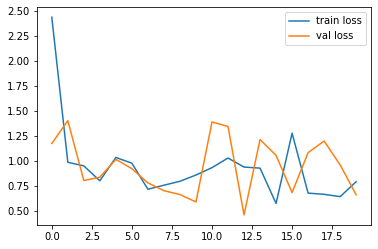

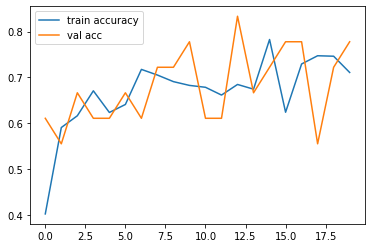

<Figure size 432x288 with 0 Axes>

In [30]:
# plot loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/grive/My Drive/Colab Notebooks/Cotton Disease/LossVal_loss')

# plot accuracy
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/grive/My Drive/Colab Notebooks/Cotton Disease/AccVal_acc')

In [31]:
# save file as h5 format

model.save('/content/grive/My Drive/Colab Notebooks/Cotton Disease/model_resnet50.h5')

In [32]:
prediction=model.predict(test_set)
prediction

array([[8.06090757e-02, 1.76448822e-01, 7.35124946e-01, 7.81707745e-03],
       [5.54152997e-03, 1.65225385e-04, 9.93559182e-01, 7.34122179e-04],
       [5.68096712e-03, 1.08810194e-01, 7.05770627e-02, 8.14931810e-01],
       [2.31580045e-02, 6.66767846e-06, 1.75462514e-01, 8.01372826e-01],
       [2.22508293e-02, 1.04386490e-02, 3.83686841e-01, 5.83623707e-01],
       [6.71865512e-03, 7.57899463e-01, 2.20796600e-01, 1.45852277e-02],
       [8.49381864e-01, 9.60869342e-02, 3.98492292e-02, 1.46820275e-02],
       [7.43007194e-03, 9.50369656e-01, 7.55533809e-04, 4.14447337e-02],
       [3.03847133e-03, 4.78429538e-05, 9.96887624e-01, 2.60490488e-05],
       [9.89229500e-01, 1.17506156e-08, 1.06672505e-02, 1.03246377e-04],
       [9.15683247e-03, 9.83001888e-01, 8.32213031e-04, 7.00912299e-03],
       [4.36733506e-04, 4.68252672e-08, 9.99562919e-01, 1.94271252e-07],
       [1.93840169e-04, 1.67980979e-05, 9.99735534e-01, 5.38480090e-05],
       [1.19762151e-02, 2.11335629e-01, 3.26717257e

In [33]:
predictions=np.argmax(prediction,axis=1)
predictions

array([2, 2, 3, 3, 3, 1, 0, 1, 2, 0, 1, 2, 2, 3, 1, 2, 1, 2])

In [35]:
# Now load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/grive/My Drive/Colab Notebooks/Cotton Disease/model_resnet50.h5')

In [36]:
img=image.load_img('/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/test/fresh cotton plant/dsd (223).jpg',
                   target_size=(224,224))

In [37]:
x=image.img_to_array(img)
x

array([[[ 57., 138.,  18.],
        [ 55., 136.,  16.],
        [ 69., 142.,  25.],
        ...,
        [100., 158.,  81.],
        [106., 160.,  76.],
        [101., 155.,  77.]],

       [[ 69., 144.,  15.],
        [ 74., 150.,  28.],
        [ 64., 138.,  17.],
        ...,
        [143., 188.,  83.],
        [172., 199.,  84.],
        [107., 152.,  69.]],

       [[ 64., 139.,  10.],
        [ 51., 128.,   0.],
        [ 92., 167.,  40.],
        ...,
        [144., 185.,  57.],
        [130., 176.,  67.],
        [ 96., 149.,  57.]],

       ...,

       [[ 60.,  53.,  35.],
        [ 66.,  57.,  42.],
        [ 55.,  46.,  29.],
        ...,
        [ 70., 117.,  49.],
        [ 72., 122.,  49.],
        [ 76., 128.,  54.]],

       [[ 67.,  60.,  42.],
        [ 69.,  62.,  44.],
        [ 87.,  78.,  61.],
        ...,
        [ 77., 127.,  58.],
        [ 82., 132.,  61.],
        [ 74., 126.,  54.]],

       [[ 63.,  56.,  38.],
        [ 76.,  69.,  51.],
        [ 78.,  

In [38]:
x.shape

(224, 224, 3)

In [39]:
x=x/255

In [42]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

array([[1.5905759e-07, 0.0000000e+00, 9.9999988e-01, 0.0000000e+00]],
      dtype=float32)

In [45]:
a=np.argmax(model.predict(img_data),axis=1)
a

array([2])

In [46]:
a==1

array([False])

In [47]:
a==0

array([False])

In [48]:
a==2

array([ True])